# Project 5 - Linear Regression - Diamonds Dataset!

In [525]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

In [255]:
data = pd.read_csv('diamonds.csv')
rick_data = pd.read_csv('rick_diamonds.csv')

# Taking a look at the dataset

In [183]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
1,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
2,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
3,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
4,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48


In [282]:
data.query('x == 0')

,carat,cut,color,clarity,depth,table,price,x,y,z,predicted
10119,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0,12185.167569
10825,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0,12087.627936
14433,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0,13784.894986
22240,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0,19058.341600
23795,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0,16022.583366
24864,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0,24550.393582
44936,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0,7567.440780


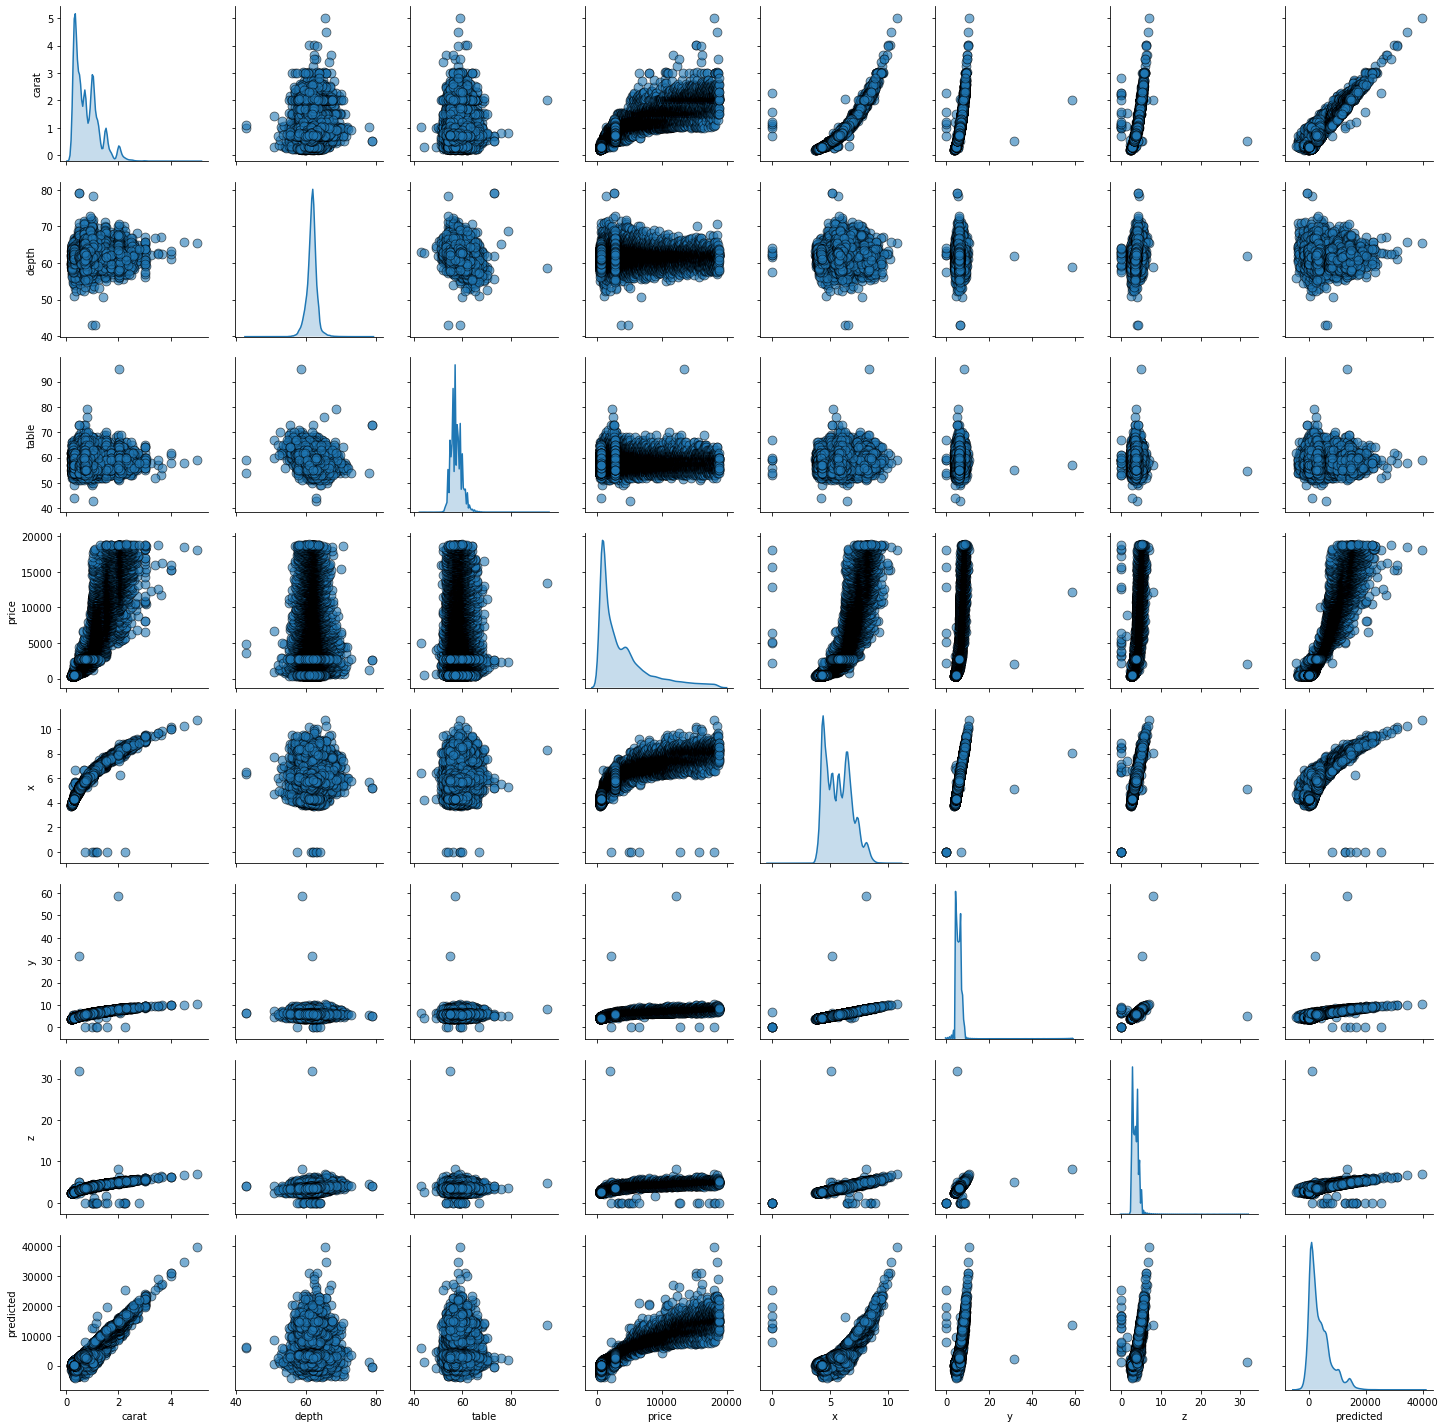

In [314]:
sns.pairplot(data, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

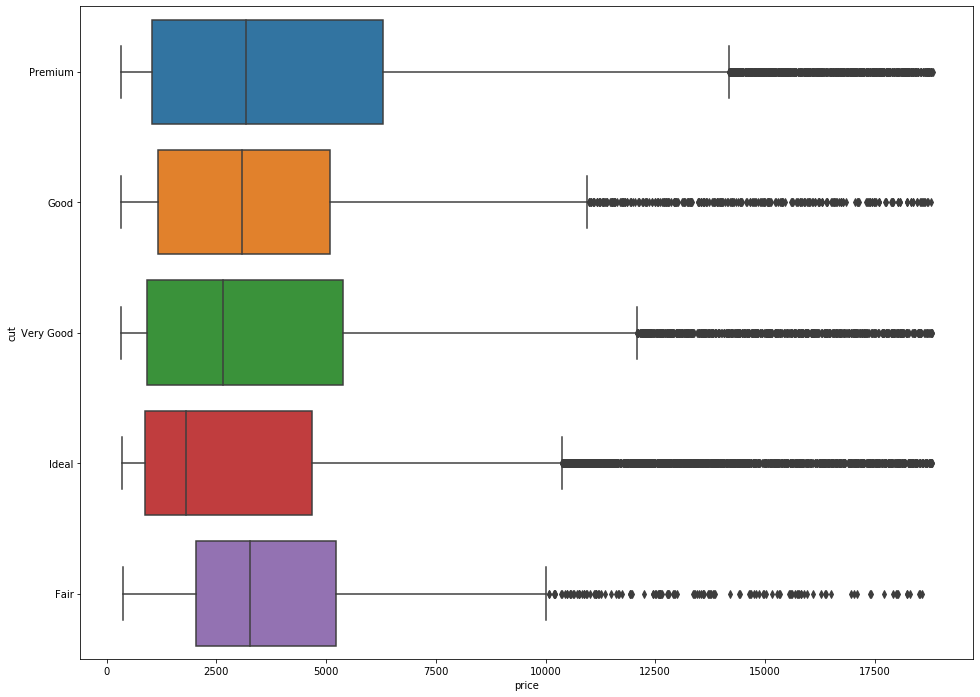

In [210]:
plt.figure(figsize=(16,12))
sns.boxplot(data.price, y=data.cut)

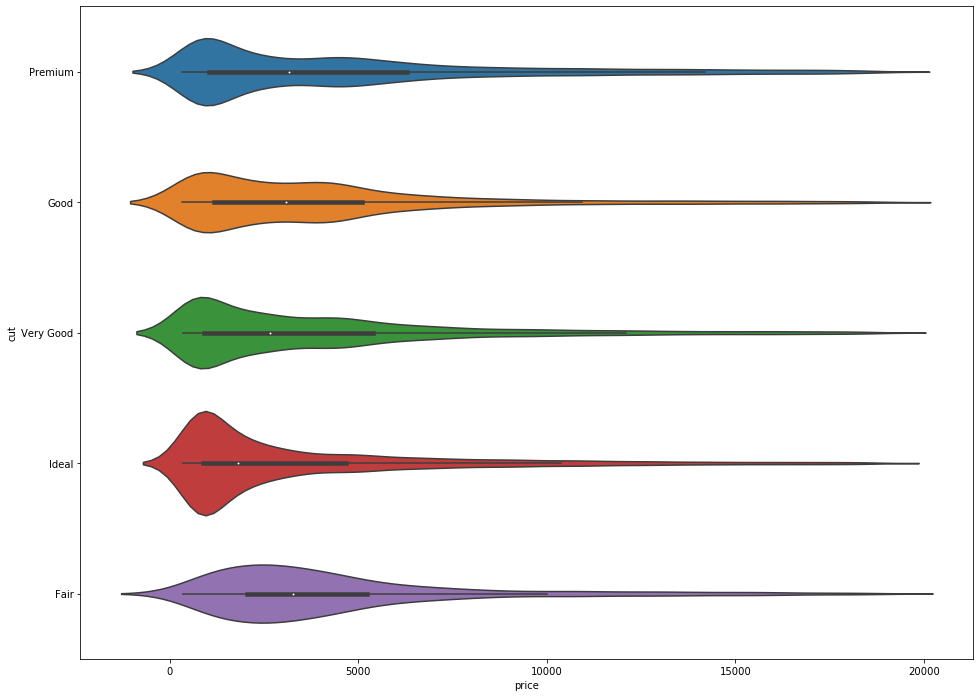

In [206]:
plt.figure(figsize=(16,12))
sns.violinplot(data.price, y=data.cut)

In [190]:
# Analyzing by cut
data.groupby('cut').describe().T.loc['price']

cut,Fair,Good,Ideal,Premium,Very Good
count,1460.000000,4443.000000,19608.000000,12507.000000,10922.000000
mean,4341.959589,3969.581139,3455.671869,4581.900376,3983.634499
std,3556.754297,3707.289197,3807.408351,4349.112795,3928.621899
min,361.000000,327.000000,340.000000,326.000000,336.000000
25%,2035.750000,1168.000000,878.000000,1042.500000,910.000000
50%,3270.500000,3087.000000,1810.500000,3170.000000,2651.500000
75%,5229.500000,5090.500000,4675.000000,6300.000000,5383.000000
max,18574.000000,18788.000000,18806.000000,18823.000000,18818.000000


# Estimating prices

## - First Try - Our first estimative would be getting the mean_price, and comparing it to the true prices to generate a score

In [71]:
mean_price = data.loc[:,'price'].mean()
y_pred1 = mean_price

## Second Try - use all info, no cleaning:
"There are many factors affecting the price of diamonds. Colour, Clarity, Carat (size), Cut, Shape and Fluorescence are the major determinants of the price of diamonds. Difference in single grade or level will make the price change from 5% to 30%."

In [417]:
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = data.iloc[:,6]

model = LinearRegression()

X = pd.get_dummies(X, drop_first=True)
model.fit(X,y)
y_pred2 = model.predict(X)
get_scores(data,y_pred2,rmse1)

RMSE: 1125.276
R2 score: 0.92043
change in RMSE: -71.79

great success!!


(1125.2756226826166, 0.9204342924671967)

## try - depth is a value that is a function of x, y and z. remove it? NO!

In [132]:
#load basics
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = data.iloc[:,6]

model = LinearRegression()

In [133]:
X = X.drop('depth',axis=1)

In [134]:
X = X.drop('table',axis=1)
X = pd.get_dummies(X, drop_first=True)
model.fit(X,y)
y_pred3 = model.predict(X)

After all it worsens!

## eth try - Also remove "Table"? remove it? NO!

In [135]:
#load basics
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = data.iloc[:,6]

model = LinearRegression()

In [136]:
X = X.drop('table',axis=1)
X = pd.get_dummies(X, drop_first=True)
model.fit(X,y)
y_pred4 = model.predict(X)

After all it worsens!

## Removing data with x,y and z = 0? NO!

In [295]:
#loading basics
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
X = pd.get_dummies(X, drop_first=True)
y = data.iloc[:,6]

# Let us try to remove rows where x,y and z are equal zero
new_data = data.query('x != 0 or y != 0 or z != 0')

#load new basics
new_X = new_data.iloc[:,[0,1,2,3,4,5,7,8,9]]
new_X = pd.get_dummies(new_X, drop_first=True)

new_y = new_data.iloc[:,6]

model = LinearRegression()
model.fit(new_X,new_y)
y_pred5 = model.predict(X)

get_scores(data,y_pred5,rmse2)

RMSE: 1125.498
R2 score: 0.9204
change in RMSE: 0.02

it worsened!!


(1125.4979826893798, 0.9204028442087532)

## Maybe removing outliers from X, Y and Z?

x       AxesSubplot(0.125,0.125;0.227941x0.755)
y    AxesSubplot(0.398529,0.125;0.227941x0.755)
z    AxesSubplot(0.672059,0.125;0.227941x0.755)
dtype: object

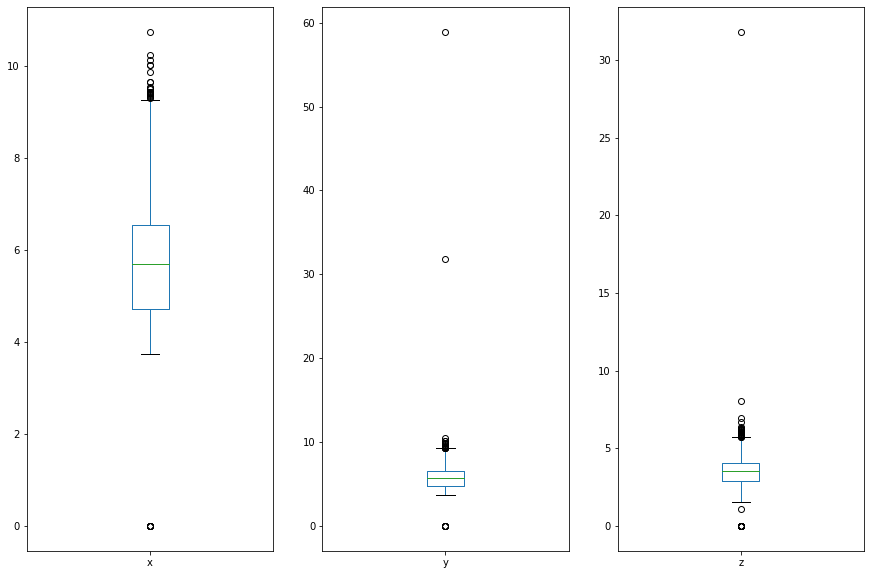

In [312]:
data.loc[:,['x','y','z']].plot(kind='box',figsize=(15,10),subplots=True)

## another try...

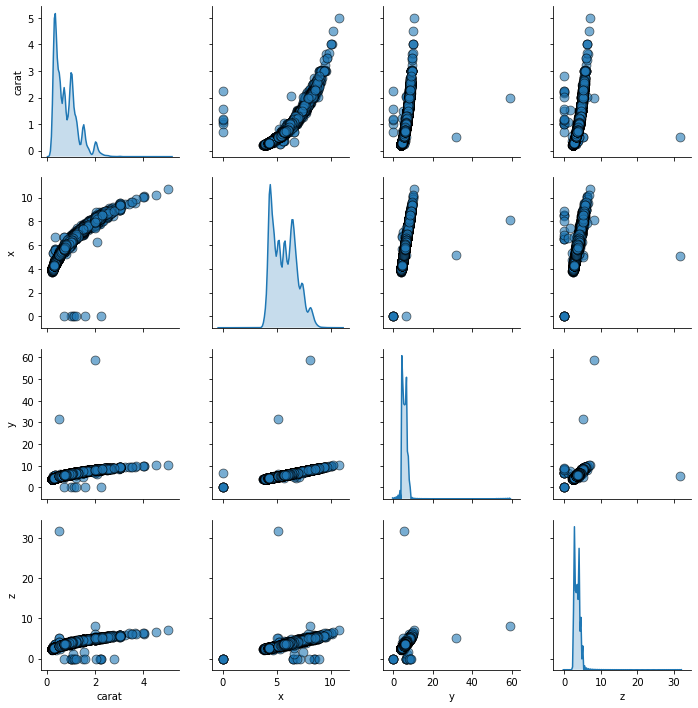

In [320]:
diamonds = data.iloc[:,[0,7,8,9]]
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

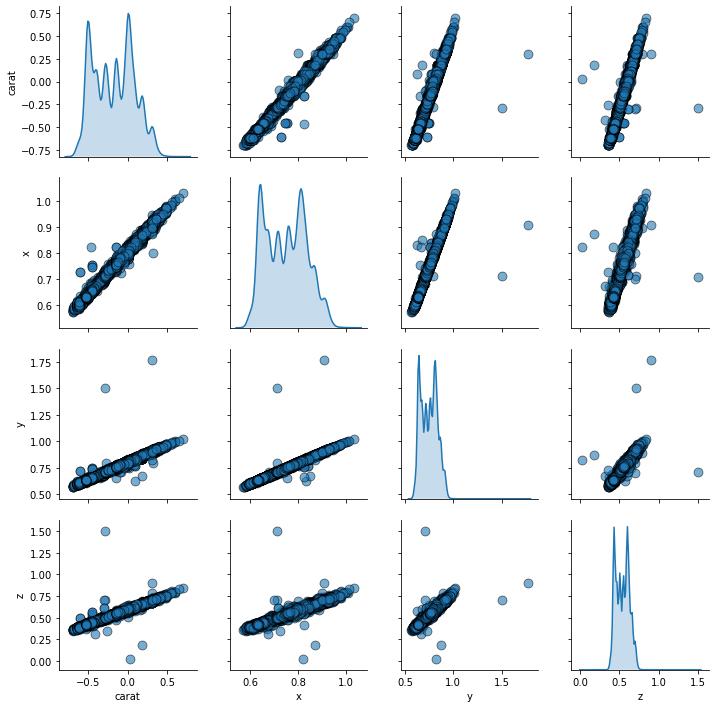

In [331]:
diamonds = data.iloc[:,[0,7,8,9]]
diamonds = diamonds.apply(lambda x: np.log10(x))
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

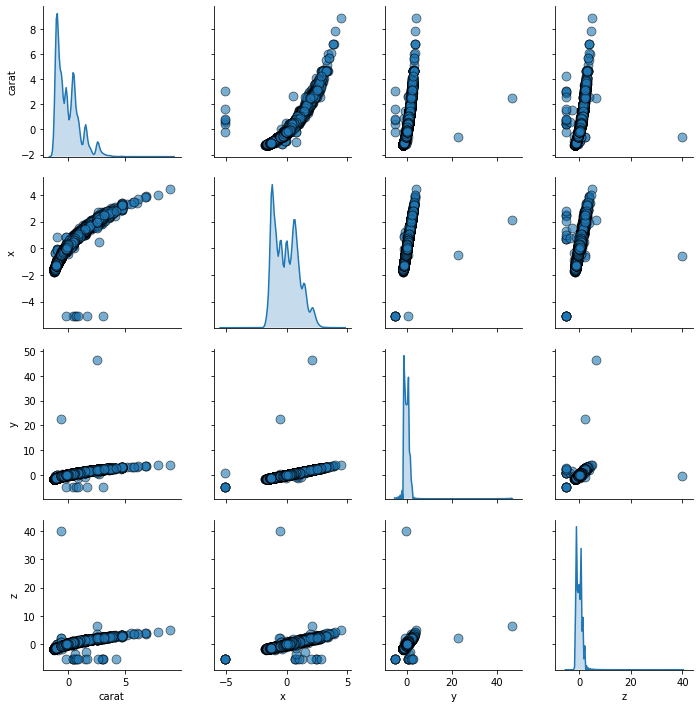

In [355]:
diamonds = data.iloc[:,[0,7,8,9]]
diamonds = diamonds.apply(lambda x: (x - x.mean())/x.std())
sns.pairplot(diamonds, diag_kind = 'kde', plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'})

In [358]:
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
X.query('x != 0 or y !=0 or z !=0')

,carat,cut,color,clarity,depth,table,x,y,z
2010,1.00,Premium,G,SI2,59.1,59.0,6.55,6.48,0.0
2104,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0
4323,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0
4941,1.01,Premium,F,SI2,59.2,58.0,6.50,6.47,0.0
9187,1.50,Good,G,I1,64.0,61.0,7.15,7.04,0.0
10119,1.07,Ideal,F,SI2,61.6,56.0,0.00,6.62,0.0
10825,1.00,Very Good,H,VS2,63.3,53.0,0.00,0.00,0.0
12290,1.15,Ideal,G,VS2,59.2,56.0,6.88,6.83,0.0
14433,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0
22126,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0


In [505]:
data = pd.read_csv('diamonds.csv')
data_log10 = data.query('x != 0 and y !=0 and z !=0')
data_log10.iloc[:,[0,6,7,8,9]] = data_log10.iloc[:,[0,6,7,8,9]].apply(lambda x: np.log10(x))
data_log10 = data_log10.loc[:,['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y','z']]
data_log10.columns = ['log10_carat', 'cut', 'color', 'clarity', 'log10_price', 'log10_x', 'log10_y','log10_z']
data_log10.head()

,log10_carat,cut,color,clarity,log10_price,log10_x,log10_y,log10_z
0,-0.677781,Premium,E,SI1,2.513218,0.589950,0.584331,0.363612
1,-0.638272,Good,E,VS1,2.514548,0.607455,0.609594,0.363612
2,-0.537602,Premium,I,VS2,2.523746,0.623249,0.626340,0.419956
3,-0.508638,Good,J,SI2,2.525045,0.637490,0.638489,0.439333
4,-0.619789,Very Good,J,VVS2,2.526339,0.595496,0.597695,0.394452


In [539]:
#loading basics
new_X = data_log10.loc[:,['log10_carat', 'cut', 'color', 'clarity', 'log10_x', 'log10_y','log10_z']]
new_y = data_log10.loc[:,'log10_price']
new_X_dummies = pd.get_dummies(new_X, drop_first=True)

model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(new_X_dummies, new_y, test_size=0.33, random_state=42)


model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [540]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_true=y_test, y_pred=y_pred)

In [541]:
print(f'rmse:{rmse}')
print(f'r2:{r2}')

rmse:0.05673496696816165
r2:0.9834133581021718


## backup

In [ ]:
#loading basics
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
X = pd.get_dummies(X, drop_first=True)
y = data.iloc[:,6]

# Let us try to remove rows where x,y and z are equal zero
new_data = data.query('x != 0 or y != 0 or z != 0')

#load new basics
new_X = new_data.iloc[:,[0,1,2,3,4,5,7,8,9]]
new_X = pd.get_dummies(new_X, drop_first=True)

new_y = new_data.iloc[:,6]

model = LinearRegression()
model.fit(new_X,new_y)
y_pred5 = model.predict(X)

get_scores(data,y_pred5,rmse2)

# Test zone

In [147]:
#load basics
X = data.iloc[:,[0,1,2,3,4,5,7,8,9]]
y = data.iloc[:,6]

model = LinearRegression()
X = X.drop(['table','depth'],axis=1)

In [231]:
get_scores(data,y_pred2,rmse2)

RMSE: 1125.276
R2 score: 0.92043
change in RMSE: 0.0

it worsened!!


(1125.2756226826166, 0.9204342924671967)

# Check score

Here we will check the score generated for each step. We will define a function to help simplify the process

In [128]:
def get_scores(data, y_pred,rmse_to_compare=0):
    """This functions receives the y_pred for the prices of the diamond dataframe and prints the scores.
    It also prints comparations. If rmse_to_compare is 0, no comparation will be made.
    """
    
    data['predicted'] = y_pred
    mse = mean_squared_error(data.price, data.predicted)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true=data.price, y_pred=data.predicted)
    print(f'RMSE: {round(rmse,3)}')
    print(f'R2 score: {round(r2,5)}')
    
    if rmse_to_compare != 0:
        comparation = round((rmse-rmse_to_compare)/rmse_to_compare*100,2)
        print(f'change in RMSE: {comparation}')
        
        if comparation < 0:
            print('\ngreat success!!')
            
        else:
            print('\nit worsened!!')
    
    return rmse,r2

## Scores for 1nd try

In [129]:
rmse1,rsqr1 = get_scores(data,y_pred1)

RMSE: 3989.293
R2 score: 0.0


## Scores for 2nd try

In [170]:
rmse2,rsqr2 = get_scores(data,y_pred2,rmse1)

RMSE: 1125.276
R2 score: 0.92043
change in RMSE: -71.79

great success!!


## Scores for removing "depth"

In [137]:
rmse3,rsqr3 = get_scores(data,y_pred3,rmse2)

RMSE: 1127.605
R2 score: 0.9201
change in RMSE: 0.21

it worsened!!


## Scores for removing "table"

In [139]:
rmse4,rsqr4 = get_scores(data,y_pred4,rmse2)

RMSE: 1126.089
R2 score: 0.92032
change in RMSE: 0.07

it worsened!!


# We now predict the values of the the rick_diamonds dataset

In [455]:
rick_data = pd.read_csv('rick_diamonds.csv')

In [179]:
X_test = pd.get_dummies(rick_data,drop_first=True)

In [180]:
#updating with what we have got
y_pred = model.predict(X_test)
rick_data['price_predicted'] = y_pred
rick_data.head()

,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,3035.259972
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,754.091265
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1393.271663
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,7251.526074
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,16787.987185


# Export Data

In [181]:
rick_data.to_csv('rick_price_pred.csv',index=False)

## Small test

In [603]:
rick_data = pd.read_csv('rick_diamonds.csv')
mike = rick_data.copy()

# dropping depth and table, they are not worth it.
mike = mike.drop(['depth', 'table'],axis=1)

# Separating values:
mike1 = mike.query('x ==0 or y == 0 or z== 0')
mike2 = mike.query('x !=0 and y != 0 and z != 0')

mike2.iloc[:,[0,4,5,6]] = mike2.iloc[:,[0,4,5,6]].apply(lambda x: np.log10(x))

mike2 = mike2.loc[:,['carat', 'cut', 'color', 'clarity', 'x', 'y','z']]
mike2.columns = ['log10_carat', 'cut', 'color', 'clarity', 'log10_x', 'log10_y','log10_z']

mike2_dummies = pd.get_dummies(mike2, drop_first=True)
y_mike2_pred = model.predict(mike2_dummies)
mike2['predicted_price'] = y_mike2_pred

# put everything back to normal scale
mike2.iloc[:,[0,4,5,6,7]] = mike2.iloc[:,[0,4,5,6,7]].apply(lambda x: round(10**x,2))

#put columns back to its name
mike2.columns = ['carat', 'cut', 'color', 'clarity', 'x', 'y', 'z', 'predicted_price']

# now, the other part, which we cannot apply the log for solving, we just "copy" the mean from mike2
mike1['predicted_price'] = mike2['predicted_price'].mean()

mike = pd.concat([mike1,mike2]).sort_index()

rick_data['price_predicted'] = mike['predicted_price']
rick_data.head()

C:\Users\vFarn\AppData\Roaming\Python\Python38\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
<ipython-input-603-5953f2025d4d>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mike1['predicted_price'] = mike2['predicted_price'].mean()


,carat,cut,color,clarity,depth,table,x,y,z,price_predicted
0,0.91,Very Good,H,SI2,63.4,57.0,6.10,6.18,3.89,2863.67
1,0.38,Good,F,VS2,60.3,61.0,4.68,4.71,2.83,866.66
2,0.52,Ideal,H,VS2,61.8,56.0,5.19,5.16,3.20,1455.47
3,1.10,Ideal,G,VS1,61.3,56.0,6.65,6.69,4.09,6980.10
4,2.28,Ideal,G,SI2,61.6,57.0,8.44,8.37,5.18,18729.93
